In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_fum_salary_18-19')

In [3]:
rbs.dtypes

NAME         object
FUM           int64
FUM_rank    float64
salary        int64
dtype: object

In [4]:
rbs.head()

,NAME,FUM,FUM_rank,salary
0,Nick Chubb,0,16.0,1845774
1,LeSean McCoy,0,16.0,8000000
2,Leonard Fournette,0,16.0,6787711
3,Marshawn Lynch,0,16.0,4500000
4,Isaiah Crowell,0,16.0,4000000


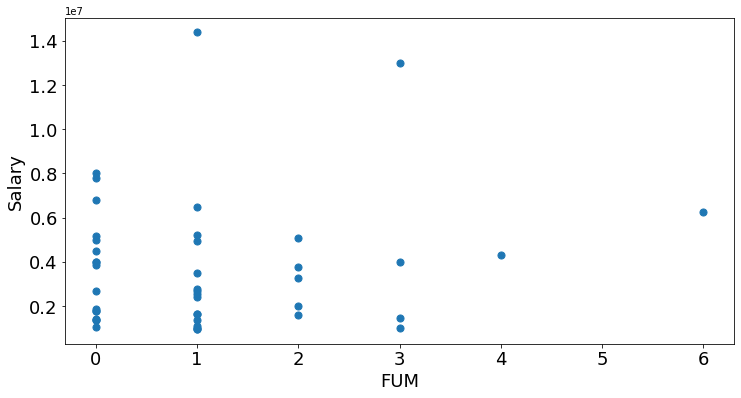

In [5]:
ax = rbs.plot(kind="scatter", x = 'FUM',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('FUM', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['FUM', 'salary']])

In [7]:
X.mean(axis = 0)

array([4.03717464e-17, 2.27091073e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.38473407, -0.64666533],
       [-0.65903521,  0.62001384],
       [ 0.7124705 ,  3.43833696],
       [ 1.14786914, -0.25158871],
       [ 3.8473407 ,  0.88076489]])

In [11]:
km.predict(X)

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4],
      dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,FUM,FUM_rank,salary,clusters
0,Nick Chubb,0,16.0,1845774,0
1,LeSean McCoy,0,16.0,8000000,1
2,Leonard Fournette,0,16.0,6787711,1
3,Marshawn Lynch,0,16.0,4500000,1
4,Isaiah Crowell,0,16.0,4000000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[6.00000000e-01, 1.79075125e+06],
       [2.50000000e-01, 5.47969992e+06],
       [2.00000000e+00, 1.36875000e+07],
       [2.55555556e+00, 2.94133256e+06],
       [6.00000000e+00, 6.23908500e+06]])

In [14]:
rbs.groupby('clusters')[['FUM', 'salary']].mean()

,FUM,salary
clusters,,
0,0.600000,1.790751e+06
1,0.250000,5.479700e+06
2,2.000000,1.368750e+07
3,2.555556,2.941333e+06
4,6.000000,6.239085e+06


In [15]:
centroids = rbs.groupby('clusters')[['FUM', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

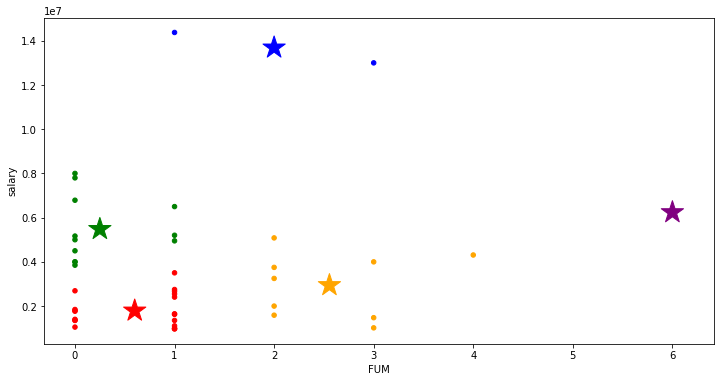

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = 'FUM', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'FUM', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

14.185706467819486

In [18]:
silhouette_score(X, km.labels_)

0.4650277986615929